In [28]:
from mp_gp_test import get_holeids, get_trainingSet_by_point, get_test_points_holeid, 
from scipy import stats
import pandas as pd
import scipy.spatial as spatial
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [31]:
# se cargan los datos de entrenamiento
train_data = pd.read_csv('../../GP_Data/cy17_spc_assays_rl6_entry.csv')
train_cols = ['midx', 'midy', 'midz', 'cut']

test_data = pd.read_csv('../../GP_Data/cy17_spc_assays_pvo_entry.csv')
test_cols = ['midx', 'midy', 'midz']
jtplot.style(theme='onedork',figsize = (14,10))

In [11]:
HOLEIDs = get_holeids()
holeid = HOLEIDs[0]
distancia = 35
test_points = get_test_points_holeid(holeid)
_, y = get_trainingSet_by_point(test_points[0,:], distancia)

 C:\Users\jpdon\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:427: RuntimeWarning:invalid value encountered in sqrt


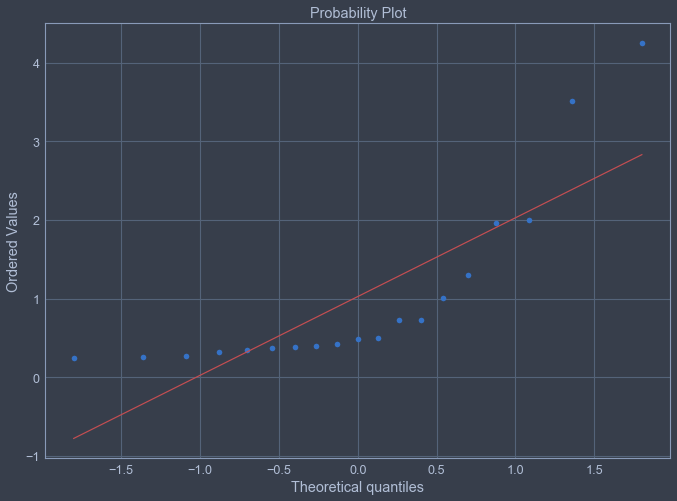

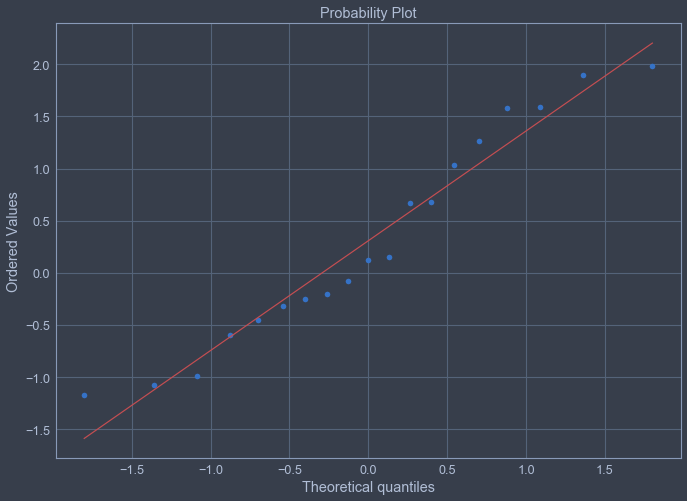

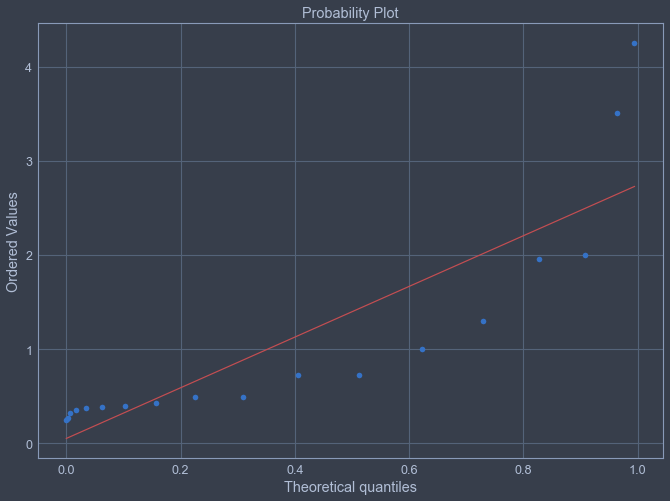

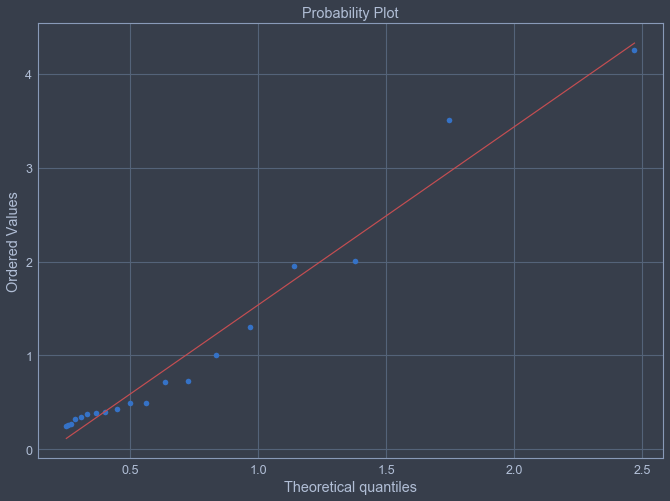

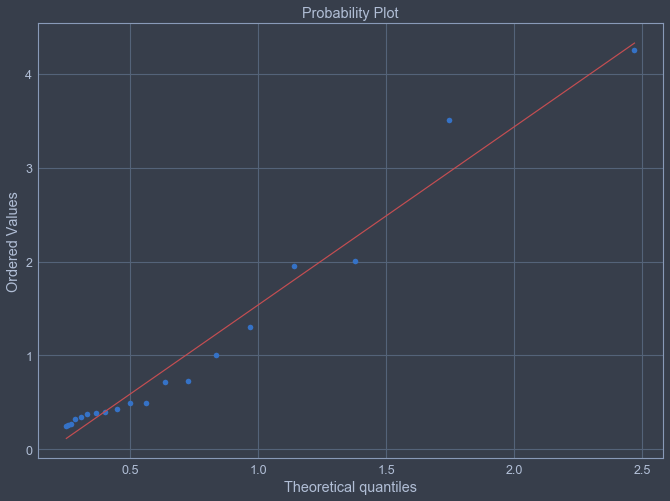

In [48]:
y_matrix = y['cut'].as_matrix()

fig = plt.figure()
ax1 = fig.add_subplot(111)
stats.probplot(y_matrix, plot = ax1)

fig = plt.figure()
ax2 = fig.add_subplot(111)
y_transf, _ = stats.boxcox(y_matrix)
y_matrix_mean = y_matrix.mean()
stats.probplot(y_transf + y_matrix_mean, plot = ax2)

fig = plt.figure()
ax3 = fig.add_subplot(111)
alpha, beta, _, _ = stats.beta.fit(y_matrix)
stats.probplot(y_matrix, dist=stats.beta(alpha,beta), plot = ax3)

fig = plt.figure()
ax4 = fig.add_subplot(111)
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(y_matrix)
stats.probplot(y_matrix, dist=stats.gamma(fit_alpha, fit_loc, fit_beta), plot = ax4)

fig = plt.figure()
ax4 = fig.add_subplot(111)
fit_alpha, fit_loc, fit_beta = stats.gamma.fit(y_matrix)
stats.probplot(y_matrix, dist=stats.gamma(fit_alpha, fit_loc, fit_beta), plot = ax4)
plt.show()